In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV,train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import KBinsDiscretizer


In [27]:
db= pd.read_csv('processed_data.csv')
strong_features = ['AGE', 'BMI', 'HbA1c', 'CLASS']
data_strong_knn = db[strong_features]


In [28]:
# Normalize numeric features
num_features = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
scaler = MinMaxScaler()
db[num_features] = scaler.fit_transform(db[num_features])

X = db.drop('CLASS', axis=1)
y = db['CLASS']

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
# K-Folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch parameters for KNN
params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]     # Manhattan, Euclidean
}

# Initialize GridSearchCV
grid_knn = GridSearchCV(KNeighborsClassifier(), params, cv=kf)
grid_knn.fit(X_train, y_train)

print("---- KNN (All Features) ----")
print("Best params:", grid_knn.best_params_)
print("Best mean CV accuracy:", grid_knn.best_score_)
print("-----------------------------------------------------")
# Evaluate on test set
best_knn = grid_knn.best_estimator_
y_pred = best_knn.predict(X_test)
test_accuracy = best_knn.score(X_test, y_test)
print("Final Test Accuracy:", test_accuracy)

---- KNN (All Features) ----
Best params: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best mean CV accuracy: 0.93125
-----------------------------------------------------
Final Test Accuracy: 0.95



Classification Report:
              precision    recall  f1-score   support

         Non       0.88      0.71      0.79        21
     Predict       0.64      0.70      0.67        10
    Diabetic       0.98      0.99      0.99       169

    accuracy                           0.95       200
   macro avg       0.83      0.80      0.81       200
weighted avg       0.95      0.95      0.95       200



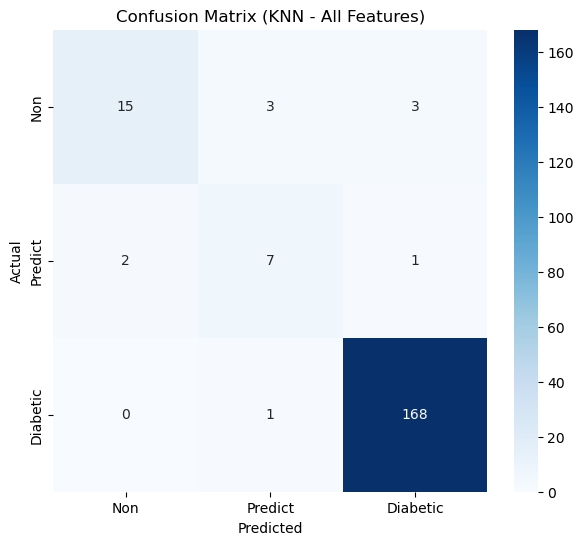

In [30]:
# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non', 'Predict', 'Diabetic']))

# Plot confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non', 'Predict', 'Diabetic'],
            yticklabels=['Non', 'Predict', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (KNN - All Features)")
plt.show()

In [32]:
# ------------------- 2. STRONG FEATURES -------------------------
X_strong_knn = data_strong_knn.drop('CLASS', axis=1)
y_strong_knn = data_strong_knn['CLASS']
num_strong_features = ['AGE', 'BMI', 'HbA1c']
kbd = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
X_strong_knn[num_strong_features] = kbd.fit_transform(X_strong_knn[num_strong_features])
X_knn_strong = data_strong_knn.drop('CLASS', axis=1)
y_knn_strong = data_strong_knn['CLASS']

# Normalize numeric strong features
X_knn_strong[num_strong_features] = scaler.fit_transform(X_knn_strong[num_strong_features])

# Train-test split (stratified)
X_train_strong, X_test_strong, y_train_strong, y_test_strong = train_test_split(
    X_knn_strong, y_knn_strong, test_size=0.2, random_state=42, stratify=y_knn_strong
)

c:\Users\abdel\anaconda3\envs\py12\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [33]:
#K-Folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_knn_strong = GridSearchCV(KNeighborsClassifier(), params, cv=kf)
grid_knn_strong.fit(X_train_strong, y_train_strong)

print("---- KNN (Strong Features) ----")
print("Best params:", grid_knn_strong.best_params_)
print("Best mean CV accuracy:", grid_knn_strong.best_score_)
print("-----------------------------------------------------")

# Evaluate on test set
best_knn_strong = grid_knn_strong.best_estimator_
y_pred_strong = best_knn_strong.predict(X_test_strong)
test_accuracy_strong = best_knn_strong.score(X_test_strong, y_test_strong)
print("Final Test Accuracy:", test_accuracy_strong)

---- KNN (Strong Features) ----
Best params: {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Best mean CV accuracy: 0.9487499999999999
-----------------------------------------------------
Final Test Accuracy: 0.955



Classification Report:
              precision    recall  f1-score   support

         Non       0.85      0.81      0.83        21
     Predict       0.78      0.70      0.74        10
    Diabetic       0.98      0.99      0.98       169

    accuracy                           0.95       200
   macro avg       0.87      0.83      0.85       200
weighted avg       0.95      0.95      0.95       200



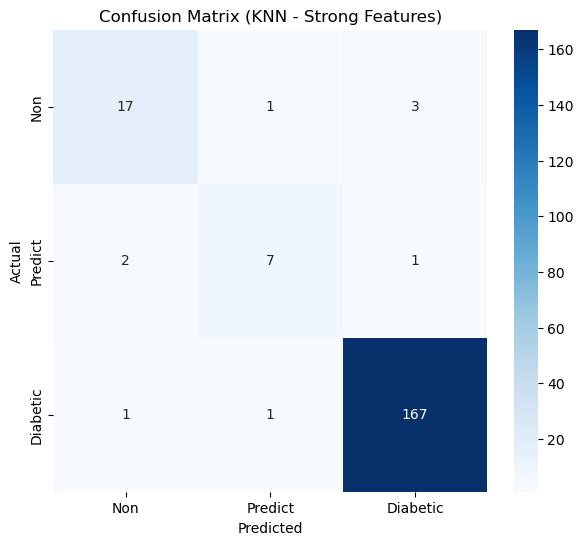

In [34]:
# Confusion matrix
cm_knn_strong = confusion_matrix(y_test_strong, y_pred_strong)
print("\nClassification Report:")
print(classification_report(y_test_strong, y_pred_strong, target_names=['Non', 'Predict', 'Diabetic']))

# Plot confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm_knn_strong, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non', 'Predict', 'Diabetic'],
            yticklabels=['Non', 'Predict', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (KNN - Strong Features)")
plt.show()
